In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
onion_data=pd.read_csv(r"C:\Users\shilp\Downloads\archive (2)\Onion.csv")
onion_data.info()
onion_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350518 entries, 0 to 350517
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    350518 non-null  int64  
 1   state         350518 non-null  object 
 2   district      350518 non-null  object 
 3   market        350518 non-null  object 
 4   commodity     350518 non-null  object 
 5   variety       350518 non-null  object 
 6   arrival_date  350518 non-null  object 
 7   min_price     350518 non-null  float64
 8   max_price     350518 non-null  float64
 9   modal_price   350518 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 26.7+ MB


,Unnamed: 0,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/19,200.0,700.0,390.0
1,1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/19,200.0,700.0,390.0
2,2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/19,200.0,920.0,490.0
3,3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/19,200.0,750.0,380.0
4,4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,11/01/19,210.0,680.0,290.0


In [5]:
print("Number of Onion Markets:", len(onion_data['market'].unique()))
print("Number of Districts:", len(onion_data['district'].unique()))
print("Number of States:", len(onion_data['state'].unique()))
print("Number of Varieties:", len(onion_data['variety'].unique()))

Number of Onion Markets: 1113
Number of Districts: 398
Number of States: 29
Number of Varieties: 21


In [6]:
min_price=list(onion_data.min_price)
max_price =list(onion_data.max_price)
model_price =list(onion_data.modal_price)
arr =[list(onion_data.state),list(onion_data.market), list(onion_data.variety)]
index =pd.MultiIndex.from_arrays(arr, names=('state','market','variety'))
onion_df = pd.DataFrame({'minimum_price':min_price,'maximum_price':max_price,'modal_price':model_price}, index=index)
onion_df.head()

minimum_price  maximum_price  modal_price
state          market  variety                                           
Andhra Pradesh Kurnool Local            200.0          700.0        390.0
                       Local            200.0          700.0        390.0
                       Local            200.0          920.0        490.0
                       Local            200.0          750.0        380.0
                       Local            210.0          680.0        290.0

In [7]:
onion_df2=onion_df.groupby(level=2,sort=False).mean().reset_index()
onion_df2.head()

,variety,minimum_price,maximum_price,modal_price
0,Local,1351.298842,2089.689577,1729.963411
1,1st Sort,1742.839875,2194.018335,1988.402417
2,Onion,1929.411982,2461.411912,2215.867079
3,Nasik,2257.415312,2551.138492,2418.024430
4,Red,1748.568476,2004.294977,1895.666381


In [8]:
print("national average modal price of onion:", round(onion_df2['modal_price'].mean()))

national average modal price of onion: 2295


In [9]:
onion_df2[onion_df2['modal_price']>2327]

,variety,minimum_price,maximum_price,modal_price
3,Nasik,2257.415312,2551.138492,2418.024430
12,Big,2980.241359,3407.359704,3193.847884
13,Small,4856.582157,5395.194647,5150.976480
17,Bombay (U.P.),2609.543578,2846.121560,2709.731651
18,Dry F.A.Q.,2514.490446,2811.703822,2721.496815
20,Bellary,5500.000000,5700.000000,5600.000000


In [10]:
onion_df2[onion_df2['modal_price']<2327].sort_values('modal_price',ascending=True)[0:5]

,variety,minimum_price,maximum_price,modal_price
10,Telagi,421.133005,1807.662562,1040.788177
14,2nd Sort,1047.560976,1655.411585,1450.076220
7,Medium,1309.866894,1655.875768,1468.659386
6,White,1148.926376,1859.717670,1546.893726
8,Puna,1008.715184,2314.703504,1597.973944


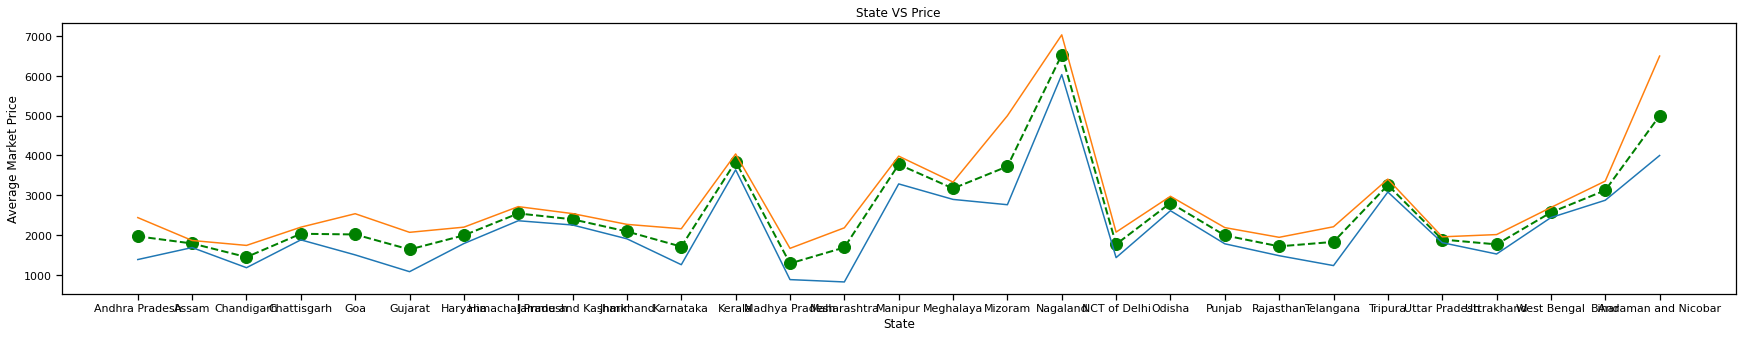

In [11]:
onion_df3=onion_df.groupby(level=0,sort=False).mean().reset_index()

plt.figure(figsize=(30,5))
sns.set_context("notebook", font_scale=1)
plt.plot(onion_df3['state'],onion_df3['modal_price'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(onion_df3['state'],onion_df3['minimum_price'])
plt.plot(onion_df3['state'],onion_df3['maximum_price'])
plt.title("State VS Price")
plt.xlabel("State")
plt.ylabel("Average Market Price")
plt.show()


In [12]:
onion_df3.sort_values('modal_price',ascending=False)[0:5]

,state,minimum_price,maximum_price,modal_price
17,Nagaland,6033.333333,7033.333333,6533.333333
28,Andaman and Nicobar,4000.000000,6500.000000,5000.000000
11,Kerala,3640.716004,4039.611039,3847.554397
14,Manipur,3285.539216,3983.578431,3774.754902
16,Mizoram,2762.500000,5000.000000,3725.000000


In [13]:
onion_df3.sort_values('modal_price')[0:5]

,state,minimum_price,maximum_price,modal_price
12,Madhya Pradesh,879.595440,1665.165609,1286.412287
2,Chandigarh,1178.947368,1739.473684,1446.052632
5,Gujarat,1079.075744,2068.347740,1637.086273
13,Maharashtra,820.783951,2181.735496,1687.231744
10,Karnataka,1254.313816,2158.074783,1708.654589


In [14]:
print("Expensive onion producing states:",onion_data[(onion_data.variety=='Bellary')|(onion_data.variety=='Small')|(onion_data.variety=='Dry F.A.Q.')|(onion_data.variety=='Big')|(onion_data.variety=='Bombay (U.P.)')|(onion_data.variety=='Hybrid')].state.unique())

Expensive onion producing states: ['Kerala' 'Maharashtra' 'Odisha' 'Punjab' 'Uttar Pradesh' 'West Bengal'
 'Karnataka' 'Tripura' 'Rajasthan' 'Telangana' 'Bihar']


In [15]:
print("Low cost onion producing states:",onion_data[(onion_data.variety=='Puna')|(onion_data.variety=='2nd Sort')|(onion_data.variety=='White')|(onion_data.variety=='Telagi')|(onion_data.variety=='Bangalore-Samall')].state.unique())

Low cost onion producing states: ['Gujarat' 'Karnataka' 'Maharashtra' 'Telangana' 'Rajasthan' 'West Bengal'
 'Jammu and Kashmir' 'Uttar Pradesh']


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr3 = scaler.fit_transform(onion_data[['modal_price','min_price','max_price']])

clusters = KMeans(5,random_state=42)# we've got k=5 using elbow plot
kmeans_model= clusters.fit(scaled_arr3)
onion_data['cluster_id']= kmeans_model.labels_
onion_data1 = onion_data.sort_values(['modal_price','cluster_id'])
onion_data1.head()

,Unnamed: 0,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cluster_id
195982,52464,Maharashtra,Latur,Ahmedpur,Onion,1st Sort,15/06/2021,1.0,1.0,1.0,0
193706,50188,Maharashtra,Amarawati,Morshi,Onion,Other,21/10/2021,2.0,2.0,2.0,0
192569,49051,Maharashtra,Ahmednagar,Rahuri,Onion,Other,29/05/2021,4.0,10.0,7.0,0
195953,52435,Maharashtra,Kolhapur,Vadgaonpeth,Onion,Local,03/09/21,13.0,15.0,14.0,0
195948,52430,Maharashtra,Kolhapur,Vadgaonpeth,Onion,Local,13/08/2021,15.0,19.0,17.0,0


In [17]:
onion_clusters = onion_data1.groupby('cluster_id')[['modal_price','min_price','max_price']].agg(['mean','std']).reset_index()
onion_clusters

cluster_id   modal_price                  min_price               \
                      mean          std          mean          std   
0          0   1218.713678   351.080276    988.016676   392.479205   
1          1   2316.664831   374.482001   2074.696590   476.478304   
2          2   3805.240201   589.567342   3570.719938   632.876041   
3          3   7028.067103  1860.842086   6709.272449  1822.061015   
4          4  39120.879121  8376.999151  34307.692308  8370.174972   

      max_price               
           mean          std  
0   1402.933362   449.817285  
1   2512.025582   465.531392  
2   4018.072499   654.797601  
3   7320.629542  1963.422493  
4  43967.032967  8901.249038

C:\Users\shilp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


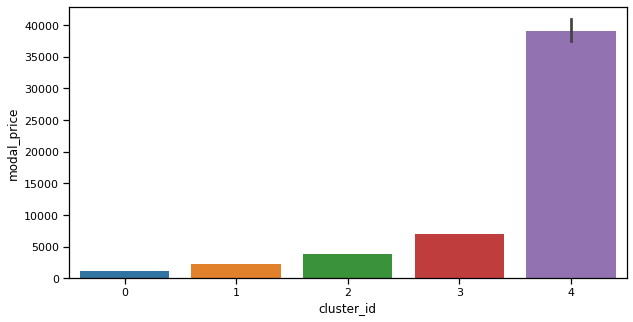

In [18]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
sns.barplot(onion_data1['cluster_id'],onion_data1['modal_price'])
plt.show()